# Python for DataScience assignement
Dataset used: https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls

## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

## 2. Loading and cleaning the dataset

In [2]:
df = pd.read_excel("dataset.xls", 1, 1)
# Removed useless col
df = df.drop(["Unnamed: 9", "Unnamed: 31", "Unnamed: 42", "Unnamed: 44"], axis = 1)
df = df.dropna() # remove NaN 
print(df.head())

       b       e   AC   FM   UC   DL   DS   DP   DR     LB ...     C    D  \
0  240.0   357.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  120.0 ...  -1.0 -1.0   
1    5.0   632.0  4.0  0.0  4.0  2.0  0.0  0.0  0.0  132.0 ...  -1.0 -1.0   
2  177.0   779.0  2.0  0.0  5.0  2.0  0.0  0.0  0.0  133.0 ...  -1.0 -1.0   
3  411.0  1192.0  2.0  0.0  6.0  2.0  0.0  0.0  0.0  134.0 ...  -1.0 -1.0   
4  533.0  1147.0  4.0  0.0  5.0  0.0  0.0  0.0  0.0  132.0 ...  -1.0 -1.0   

     E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0 -1.0 -1.0 -1.0 -1.0  1.0  -1.0    9.0  2.0  
1 -1.0  1.0 -1.0 -1.0 -1.0  -1.0    6.0  1.0  
2 -1.0  1.0 -1.0 -1.0 -1.0  -1.0    6.0  1.0  
3 -1.0  1.0 -1.0 -1.0 -1.0  -1.0    6.0  1.0  
4 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0    2.0  1.0  

[5 rows x 42 columns]


## 3. Dataset Visualisation

Let's see the corelation matrix between the features and the ```NSP``` class. 

['LB', 'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']


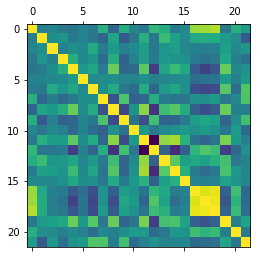

In [3]:
cor = df.iloc[:, 9:30]
cor['NSP'] = df['NSP']
print(list(cor.columns))
_ = plt.matshow(cor.corr())

The target classes are ```NSP``` or ```CLASS``` we will do a classification on ```NSP```, let's see the classes repartition in the dataset

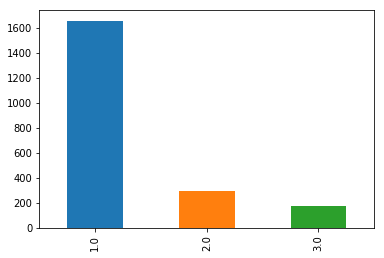

In [4]:
_ = df['NSP'].value_counts().plot(kind='bar')

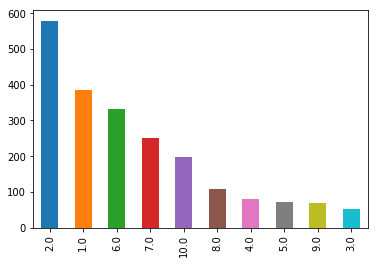

In [5]:
_ = df['CLASS'].value_counts().plot(kind='bar')

The class 1 is far more populated than the others, given the nature of the dataset it can be because most of the tested population was healthy. It however will a problem to train a model. 

There are two things we can do at this point:
* Add more data in the less represented classes, by generating it or crossing multiple datasets
* Delete data in the over represented classes 

But the dataset is imposed and shouldn't be tempered with.

## 4. Preparing Dataset

In [6]:
# Split the dataset 
train_dataset, test_dataset = train_test_split(df)

X_train = train_dataset.iloc[:, 9:30] # Select the features
Y_train = train_dataset['NSP']

X_test  = test_dataset.iloc[:, 9:30]
Y_test  = test_dataset['NSP']

X_train.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1720,131.0,0.007913,0.000000,0.004946,0.000989,0.0,0.0,54.0,1.6,0.0,...,56.0,111.0,167.0,2.0,0.0,138.0,139.0,141.0,8.0,0.0
1242,115.0,0.000000,0.000000,0.005386,0.001795,0.0,0.0,20.0,1.7,0.0,...,59.0,89.0,148.0,1.0,1.0,120.0,118.0,121.0,4.0,0.0
930,122.0,0.004745,0.000000,0.005931,0.000000,0.0,0.0,34.0,1.0,0.0,...,53.0,97.0,150.0,3.0,1.0,133.0,132.0,134.0,3.0,1.0
814,146.0,0.003361,0.000000,0.003361,0.003361,0.0,0.0,28.0,1.6,0.0,...,93.0,80.0,173.0,4.0,0.0,148.0,148.0,151.0,28.0,1.0
500,131.0,0.014178,0.015013,0.000834,0.000000,0.0,0.0,29.0,3.7,0.0,...,120.0,51.0,171.0,11.0,1.0,150.0,144.0,151.0,33.0,1.0


## 5. Models

Because we have such an unbalanced dataset, we will try a decision tree with a grid search and a xgboost because these techniques are less affected than other techniques.

In [7]:
# We will use a simple decision tree to classify
tcl = tree.DecisionTreeClassifier()
#print(tcl.get_params().keys()) # helps to see what you can do
parameters = {'max_features': np.arange(1, 10), 'max_depth': np.arange(1, 10),
              'max_leaf_nodes': np.arange(2, 10), 'min_samples_leaf': np.arange(1, 10)}

tcl_grid = GridSearchCV(tcl, parameters)
tcl_grid = tcl_grid.fit(X_train, Y_train)

In [8]:
test_result  = np.array(cross_val_score(tcl_grid, X_test,  Y_test))

print("DecisionTree cross_val test  score: between "+str(int(min(test_result)*100))+"% and "+str(int(max(test_result)*100))+"% Mean: "+str(int(test_result.mean()*100))+"%")

DecisionTree cross_val test  score: between 79% and 88% Mean: 83%


In [9]:
xgb = GradientBoostingClassifier()
xgb = xgb.fit(X_train, Y_train)

xgb_score = np.array(cross_val_score(xgb, X_test, Y_test))

print("XGBoost cross_val test score: between "+str(int(min(xgb_score)*100))+"% and "+str(int(max(xgb_score)*100))+"% Mean: "+str(int(xgb_score.mean()*100))+"%")

XGBoost cross_val test score: between 89% and 91% Mean: 90%


Even with a unevenly distributed dataset, xgboost still manages to yield a 91% accuracy. Let's save the model to use it later in a web API.

#### ROC Curve

Because our model predicts 3 classes we cannot make a roc curve directly instead, we will make a roc curve on wether a tested person is healthy or sick (aggregating the class 2 and 3). This is a binary prediciton and the roc curve associated is:

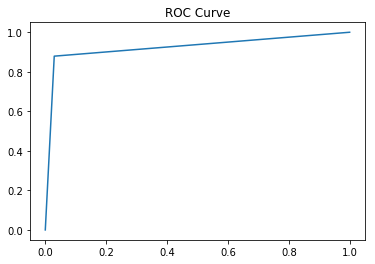

In [10]:
Y_test_bin = Y_test.replace(3.0, 2.0)
Y_pred_bin = xgb.predict(X_test)
Y_pred_bin[Y_pred_bin > 2.0] = 2.0
Y_test_bin -= 1
Y_pred_bin -= 1

fpr, tpr, _ = roc_curve(Y_test_bin, Y_pred_bin)
plt.title("ROC Curve")
_ = plt.plot(fpr, tpr)

This ROC curve is almost ideal and confirms the model strength

## 6. Saving

In [11]:
model = pickle.dumps(xgb)
with open('model.pck', 'wb') as fd:
    fd.write(model)